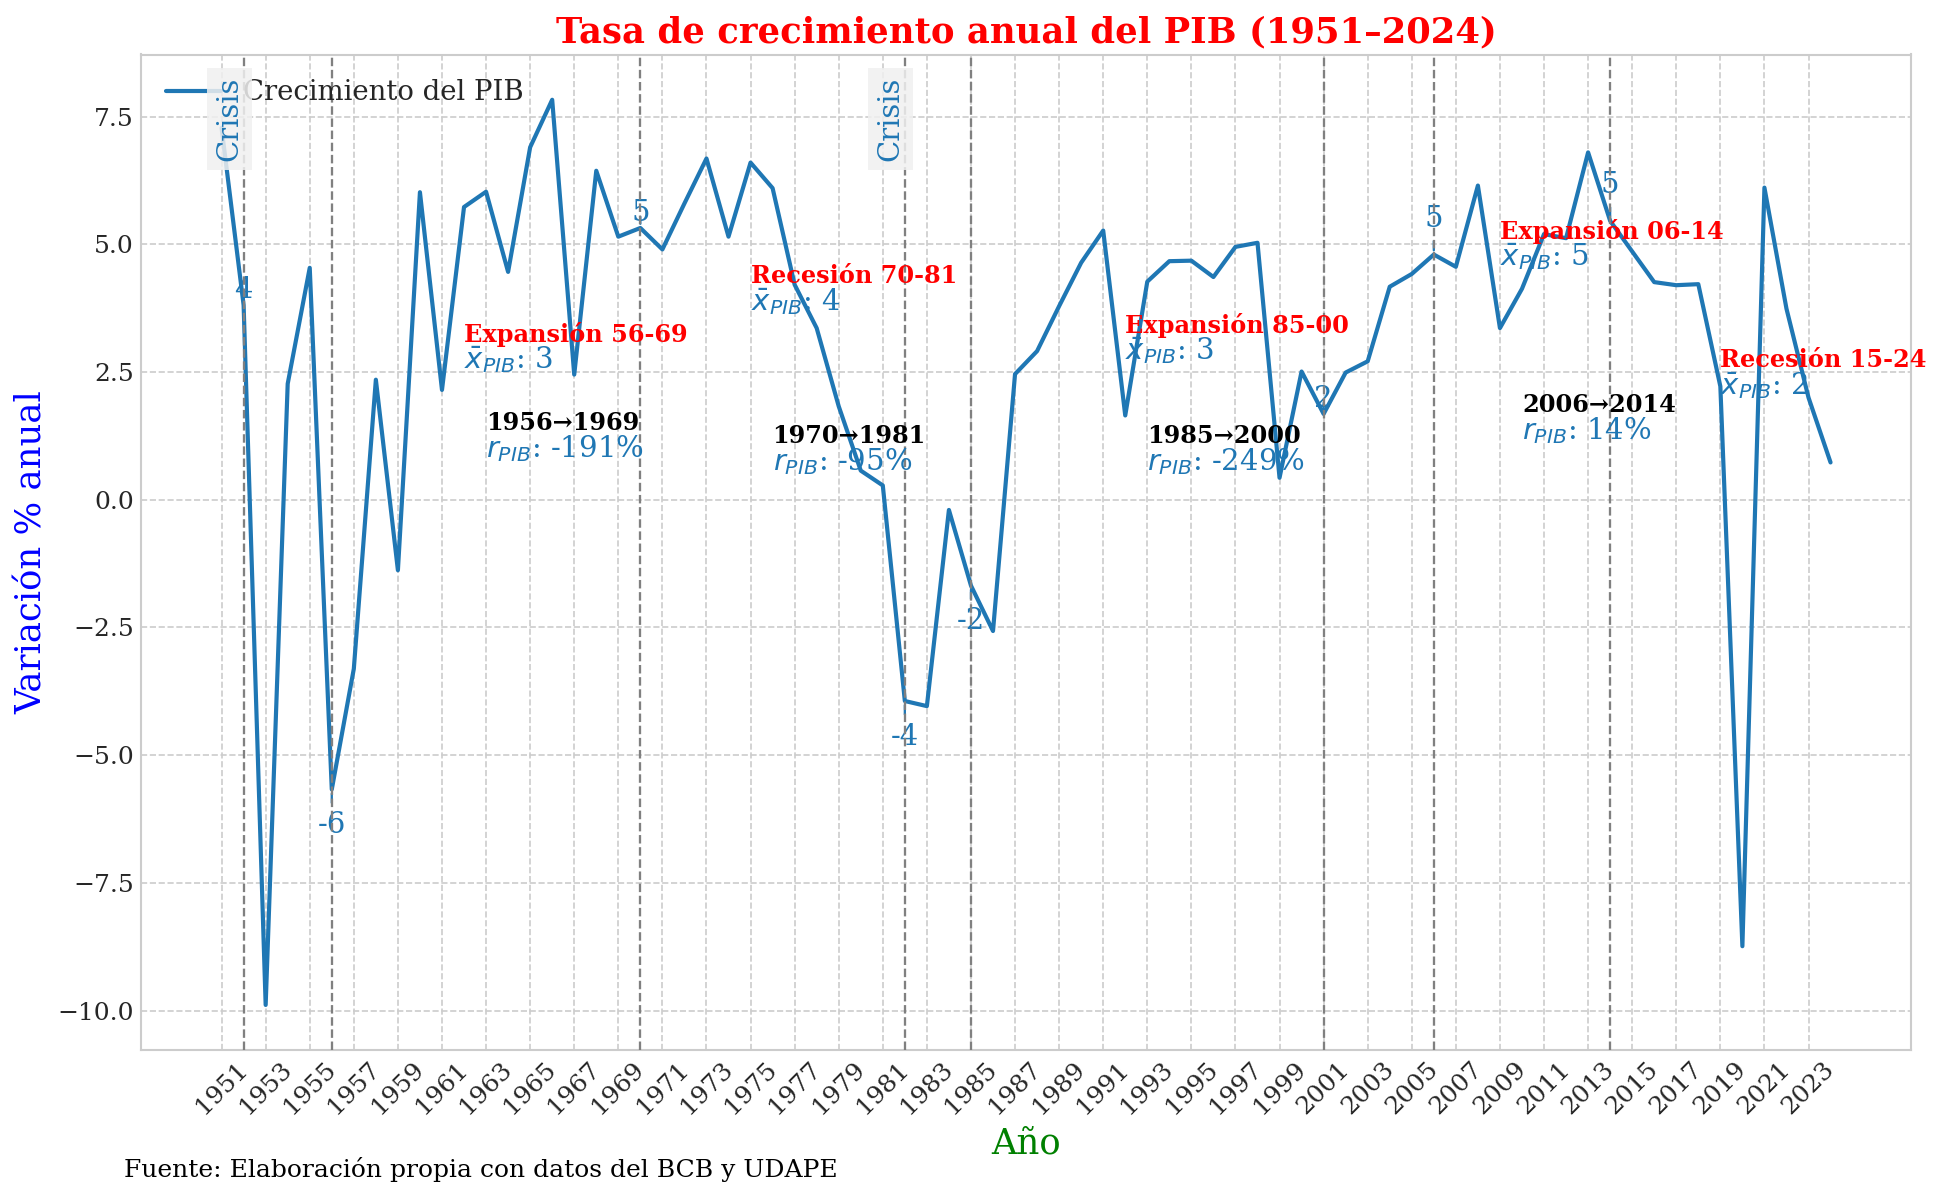

In [2]:
# tasa_crecimiento_pib.py
# ---
# jupyter:
#   jupytext:
#     formats: notebooks/tesis/serie_completa///ipynb,scripts/tesis/serie_completa///py:percent
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
# ---

# %%
# ── 1. Imports y configuración general ───────────────────────────────
import os, sys, sqlite3
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *

output_dir = "../../../../assets/tesis/serie_completa/tasa_crecimiento_pib"
os.makedirs(output_dir, exist_ok=True)
set_style()

# %%
# ── 2. Carga de datos ────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (
        pd.read_sql('SELECT * FROM tasa_crecimiento_pib', conn, index_col='año')
        .sort_index()
    )

# %%
# ── 3. Componentes y configuración ───────────────────────────────────
componentes = [("crecimiento", "Crecimiento del PIB")]
cols_componentes = ["crecimiento"]

abbr = {"crecimiento": "PIB"}
colors = {"crecimiento": "#1f77b4"}

# %%
# ── 4. Preparación de ciclos y periodos ──────────────────────────────
annot_years = adjust_annot_years(df, annot_years)
cycles = adjust_cycles(df, CYCLES)
cycle_stats = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in cycles.items()
}
periodos = adjust_periods(df, periodos_tasas)

# %%
# ── 5. Offsets ───────────────────────────────────────────────────────
# 1) Anotaciones de valores por serie y año (crecimiento)
annotation_offsets = {
    "crecimiento": {
        1952: (0,  0.3),
        1956: (0, -0.7),
        1970: (0,  0.3),
        1982: (0, -0.7),
        1985: (0, -0.7),
        2001: (0,  0.3),
        2006: (0,  0.7),
        2014: (0,  0.7),
        2023: (0,  0.3),
    }
}

# 2) Offset vertical para hitos (solo los años en hitos_v)
hitos_offset = {
    1952: 0.95,
    1956: 0.95,
    1970: 0.95,
    1982: 0.95,
    1985: 0.95,
    2001: 0.95,
    2006: 0.95,
    2014: 0.95,
}

# 3) Posición de medias por ciclo (claves según CYCLES)
medias_offsets = {
    "Expansión 56-69": (1962, 0.40),
    "Recesión 70-81":  (1975, 0.53),
    "Expansión 85-00": (1992, 0.42),
    "Expansión 06-14": (2009, 0.63),
    "Recesión 15-24":  (2019, 0.34),
}

# 4) Tasas de crecimiento anotadas por periodo
tasas_offsets = {
    "1956-1969": (1963, 0.20),
    "1970-1981": (1976, 0.17),
    "1985-2000": (1993, 0.17),
    "2006-2014": (2010, 0.24),
    "2015-2022": (2018, 0.12),
}


# %%
# ── 6. Generación de la gráfica ────────────────────────────────────── 
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=colors,
    title=f"Tasa de crecimiento anual del PIB ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Variación % anual",
    source_text="Fuente: Elaboración propia con datos del BCB y UDAPE"
)

add_hitos(ax, df.index, hitos_v, hitos_offset)
add_year_value_annotations(
    ax, df, annot_years,
    cols_componentes, annotation_offsets, colors
)
add_cycle_means_multi(
    ax, cycle_stats, medias_offsets,
    abbr, colors, line_spacing=ax.get_ylim()[1]*0.05
)
add_period_growth_annotations_multi(
    ax, df, periodos, cols_componentes,
    tasas_offsets, colors, abbr, line_spacing_ratio=0.05,
)

plt.savefig(os.path.join(output_dir, "tasa_crecimiento_pib.png"))
plt.show()

